# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

By strict definition, this dataset is a result of strategic sequence of steps and activities that promote a Portuguese banking institution's product or service, with a specific goal to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [1]:
import pandas as pd

In [107]:
df = pd.read_csv('data/bank-additional-full.csv', sep = ';') #file directory by default was corrected

In [4]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [5]:
# from this, we can observe the features with datatype(object and int64) and whether we will have to deal with NAN values. for preprocessing data before training, very good database with all the values on target
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



In [9]:
# first of all, let us find the unique values in column, which will help us decide which feature would need to be/how to be modifed to prepare the training
for column in df:
  print(df[column].unique())

[56 57 37 40 45 59 41 24 25 29 35 54 46 50 39 30 55 49 34 52 58 32 38 44
 42 60 53 47 51 48 33 31 43 36 28 27 26 22 23 20 21 61 19 18 70 66 76 67
 73 88 95 77 68 75 63 80 62 65 72 82 64 71 69 78 85 79 83 81 74 17 87 91
 86 98 94 84 92 89]
['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
['married' 'single' 'divorced' 'unknown']
['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
['no' 'unknown' 'yes']
['no' 'yes' 'unknown']
['no' 'yes' 'unknown']
['telephone' 'cellular']
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
['mon' 'tue' 'wed' 'thu' 'fri']
[ 261  149  226 ... 1246 1556 1868]
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 19 18 23 14 22 25 16 17 15 20 56
 39 35 42 28 26 27 32 21 24 29 31 30 41 37 40 33 34 43]
[999   6   4   3   5   1   0  10   7   8   9  11   2  12  13  14  15  16
  21  17  18  22  25  26  19

In [10]:
#we can observe the weight which could impact our training(normalization will be highly recommended since they have quite different mean values)
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [ ]:
 Business Objective: find the most important feature(s) to predict the decision of subscription. 

### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features (columns 1 - 7), prepare the features and target column for modeling with appropriate encoding and transformations.

In [48]:
# prepare the bank info features (col 1-7): 
df1 = df[['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'y']]


In [21]:
# before processing the data, let us find the unique values in df1, which will help us decide which feature would need to be/how to be modifed to prepare the training
for column in df1:
  print(df1[column].unique())

['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
['married' 'single' 'divorced' 'unknown']
['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
['no' 'unknown' 'yes']
['no' 'yes' 'unknown']
['no' 'yes' 'unknown']
['telephone' 'cellular']
['no' 'yes']


In [22]:
# new dataset prepared and take the first view
df1.head()

,job,marital,education,default,housing,loan,contact,y
0,housemaid,married,basic.4y,no,no,no,telephone,no
1,services,married,high.school,unknown,no,no,telephone,no
2,services,married,high.school,no,yes,no,telephone,no
3,admin.,married,basic.6y,no,no,no,telephone,no
4,services,married,high.school,no,no,yes,telephone,no


In [23]:
df1.describe()

,job,marital,education,default,housing,loan,contact,y
count,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2,2
top,admin.,married,university.degree,no,yes,no,cellular,no
freq,10422,24928,12168,32588,21576,33950,26144,36548


In [24]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   job        41188 non-null  object
 1   marital    41188 non-null  object
 2   education  41188 non-null  object
 3   default    41188 non-null  object
 4   housing    41188 non-null  object
 5   loan       41188 non-null  object
 6   contact    41188 non-null  object
 7   y          41188 non-null  object
dtypes: object(8)
memory usage: 2.5+ MB


### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [25]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [49]:
# for a simplified version with all the columns processed and visulize the label
df1['y'] = df1['y'].replace({'yes': 1, 'no': 0})
for i in range(0,df1.shape[1]):
    if df1.dtypes[i]=='object':
        df1[df1.columns[i]] = encoder.fit_transform(df1[df1.columns[i]])
        df1_name_mapping = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))
        print(df1_name_mapping)

{'admin.': 0, 'blue-collar': 1, 'entrepreneur': 2, 'housemaid': 3, 'management': 4, 'retired': 5, 'self-employed': 6, 'services': 7, 'student': 8, 'technician': 9, 'unemployed': 10, 'unknown': 11}
{'divorced': 0, 'married': 1, 'single': 2, 'unknown': 3}
{'basic.4y': 0, 'basic.6y': 1, 'basic.9y': 2, 'high.school': 3, 'illiterate': 4, 'professional.course': 5, 'university.degree': 6, 'unknown': 7}
{'no': 0, 'unknown': 1, 'yes': 2}
{'no': 0, 'unknown': 1, 'yes': 2}
{'no': 0, 'unknown': 1, 'yes': 2}
{'cellular': 0, 'telephone': 1}


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [50]:
#another overview of all the changes in this case
df1

,job,marital,education,default,housing,loan,contact,y
0,3,1,0,0,0,0,1,0
1,7,1,3,1,0,0,1,0
2,7,1,3,0,2,0,1,0
3,0,1,1,0,0,0,1,0
4,7,1,3,0,0,2,1,0
...,...,...,...,...,...,...,...,...
41183,5,1,5,0,2,0,0,1
41184,1,1,5,0,0,0,0,0
41185,5,1,6,0,2,0,0,0
41186,9,1,5,0,0,0,0,1


In [57]:
import plotly.express as px
import seaborn as sns

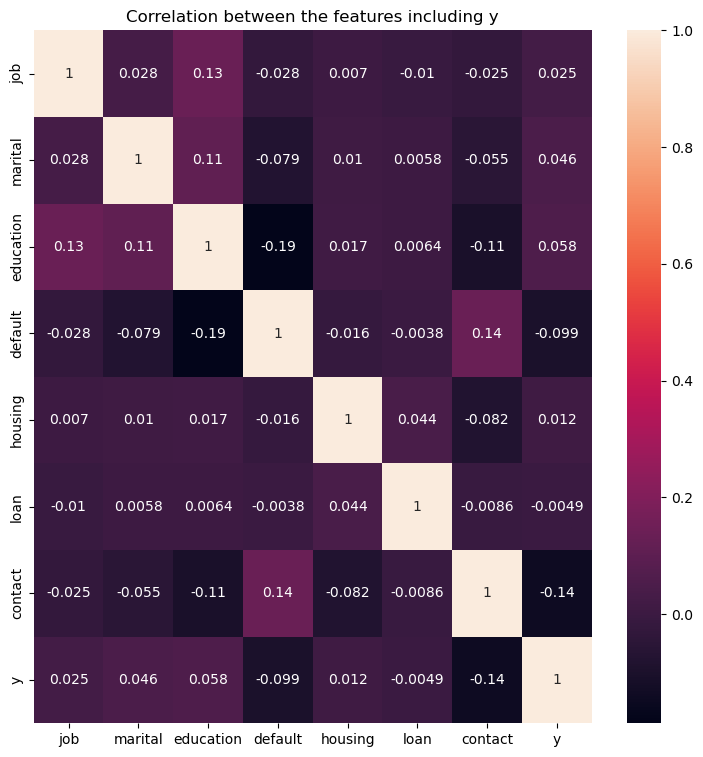

In [106]:
# now we can plot the figure to understand the correlation better/easier,we did not see any feature with strong coorelation to y(subsription) or each other. 
plt.figure(figsize=(9,9))
sns.heatmap(df1.corr(), annot=True)
plt.title('Correlation between the features including y')
plt.show()

In [108]:
# for a simplified version with all the columns processed and visulize the label

for i in range(0,df.shape[1]):
    if df.dtypes[i]=='object':
        df[df.columns[i]] = encoder.fit_transform(df[df.columns[i]])
        df_name_mapping = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))
        print(df_name_mapping)
    
df['y'] = df['y'].replace({'yes': 1, 'no': 0})


{'admin.': 0, 'blue-collar': 1, 'entrepreneur': 2, 'housemaid': 3, 'management': 4, 'retired': 5, 'self-employed': 6, 'services': 7, 'student': 8, 'technician': 9, 'unemployed': 10, 'unknown': 11}
{'divorced': 0, 'married': 1, 'single': 2, 'unknown': 3}
{'basic.4y': 0, 'basic.6y': 1, 'basic.9y': 2, 'high.school': 3, 'illiterate': 4, 'professional.course': 5, 'university.degree': 6, 'unknown': 7}
{'no': 0, 'unknown': 1, 'yes': 2}
{'no': 0, 'unknown': 1, 'yes': 2}
{'no': 0, 'unknown': 1, 'yes': 2}
{'cellular': 0, 'telephone': 1}
{'apr': 0, 'aug': 1, 'dec': 2, 'jul': 3, 'jun': 4, 'mar': 5, 'may': 6, 'nov': 7, 'oct': 8, 'sep': 9}
{'fri': 0, 'mon': 1, 'thu': 2, 'tue': 3, 'wed': 4}
{'failure': 0, 'nonexistent': 1, 'success': 2}
{'no': 0, 'yes': 1}


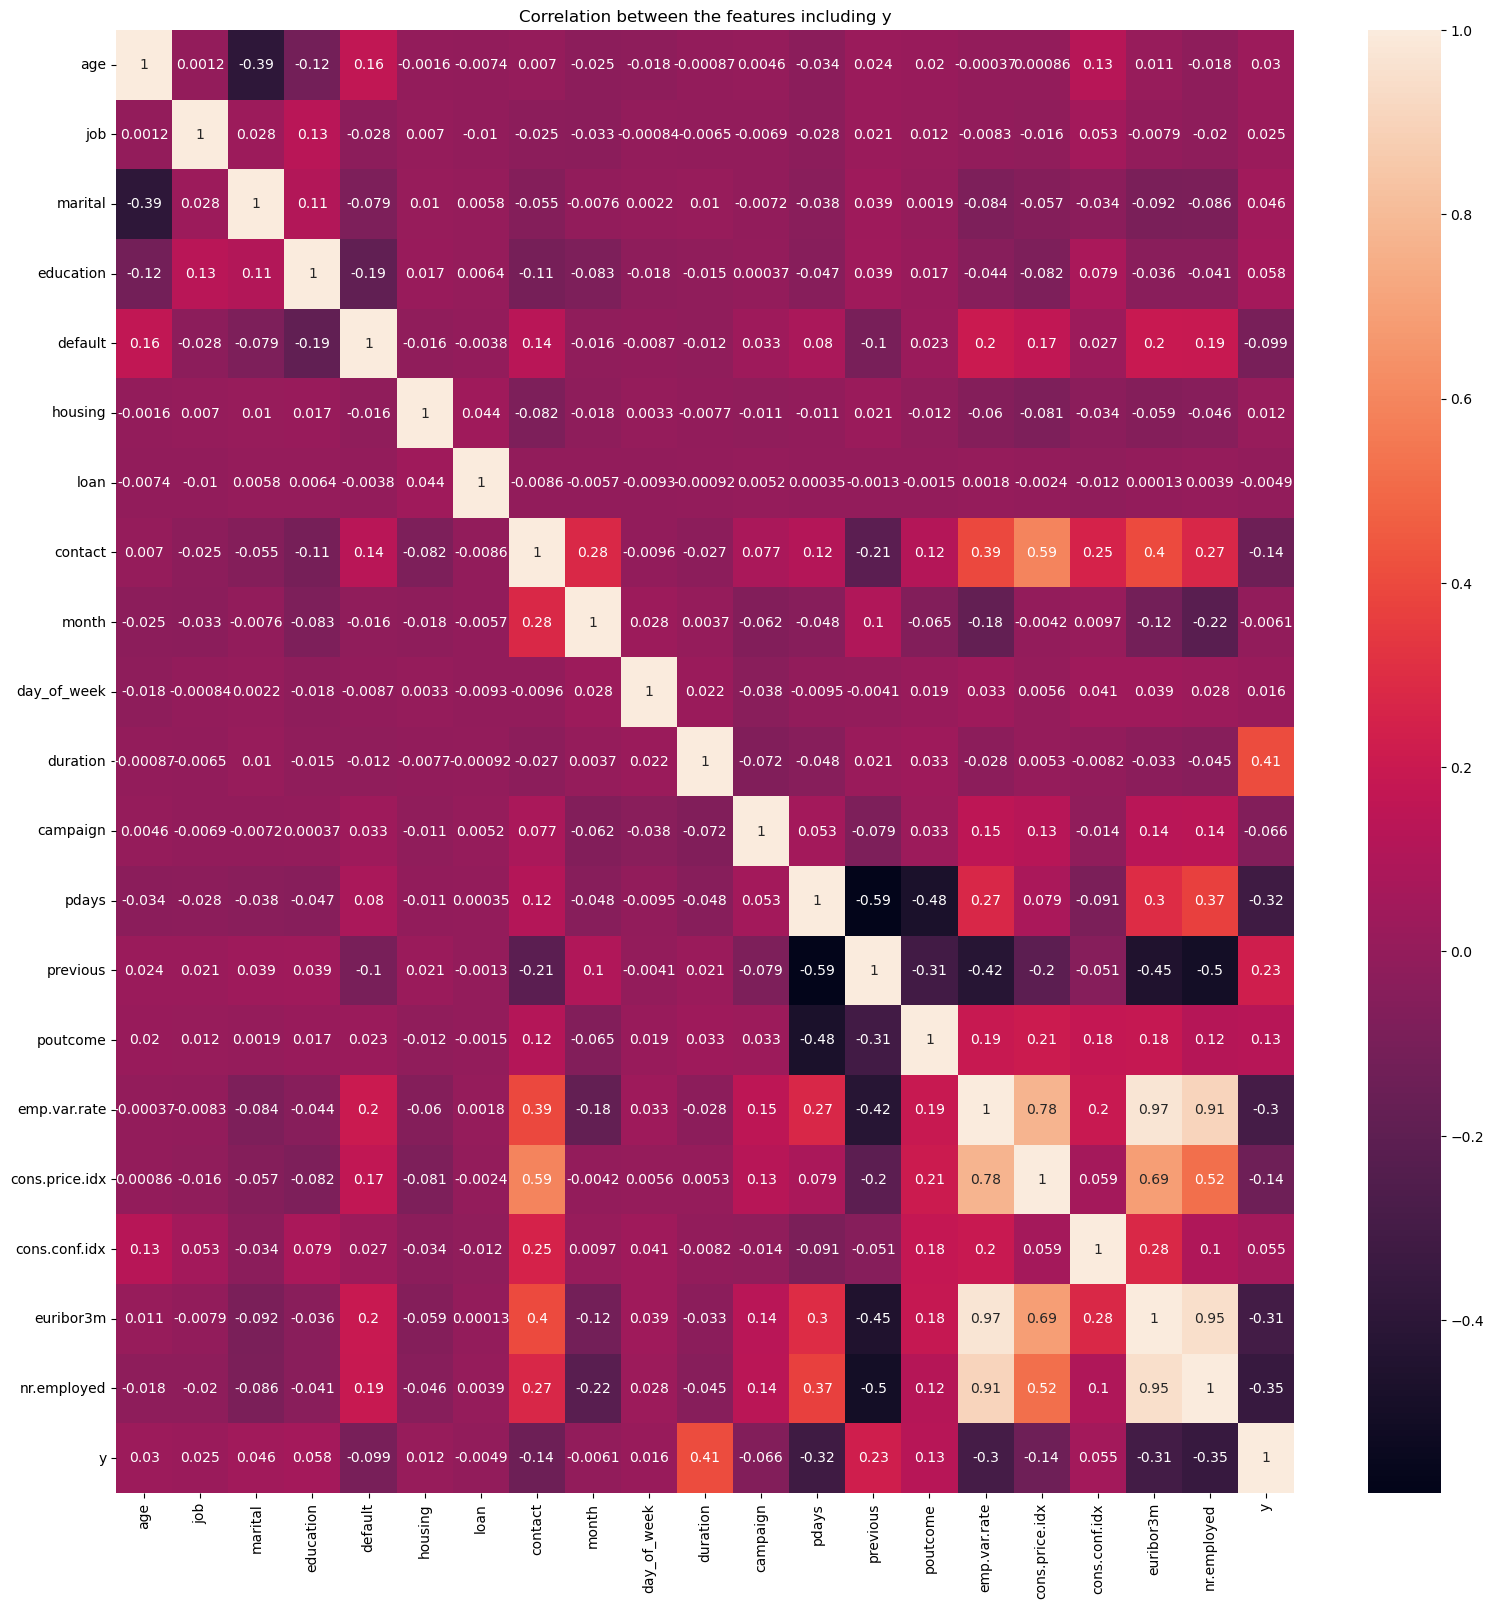

In [109]:
# secondly, what if we want to check all the features, can we process them? we can plot the figure to understand the correlation better/easier,we did not see any feature with strong coorelation to y(subsription) or each other. 
plt.figure(figsize=(19,19))
sns.heatmap(df.corr(), annot=True)
plt.title('Correlation between the features including y')
plt.show()

<AxesSubplot:xlabel='y', ylabel='count'>

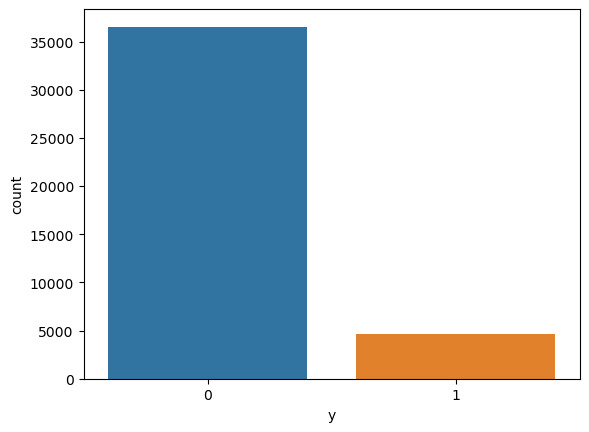

In [63]:
#we can check the data distribution with much more no than yes. 
sns.countplot(x='y',  data=df1)

In [34]:
# Split the data into training and testing sets (30% for testing and 42 random state for repeating and confirmation check)
X = df1.drop('y', axis=1)
y = df1['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

In [55]:
# Initialize the SVM classifier as our baseline model, we will explore more in the next section
svm = SVC(kernel='linear')

# Train the model with linear kernel SVC and no hyperparameters were explored to optimize the model 
svm.fit(X_train, y_train)

# Make predictions in this case just focus on test in case overfitting of the train dataset
y_pred = svm.predict(X_test)

# Calculate and display some but not great metrics 
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print("SVC metrics:")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")
print(f"ROC-AUC: {roc_auc}")

SVC metrics:
Accuracy: 0.8875940762320952
Precision: 0.0
Recall: 0.0
F1-score: 0.0
ROC-AUC: 0.6385541891878409


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [96]:
# Initialize the logistic regression model which we chose 4000 iterations 
log_reg = LogisticRegression(max_iter=4000)

# Train the model first
log_reg.fit(X_train, y_train)

# Make predictions using the model 
y_pred = log_reg.predict(X_test)
y_pred_proba = log_reg.predict_proba(X_test)[:, 1]

# Calculate and show case the paramters could be useful for the next step
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print("Logistic Regression metrics:")
print(f"Accuracy: {accuracy}")
print(f"ROC-AUC: {roc_auc}")

Logistic Regression metrics:
Accuracy: 0.8875940762320952
ROC-AUC: 0.6507216621794982


### Problem 9: Score the Model

What is the accuracy of your model?

The accuracy of the models are quite similar with Logistic Regression = 0.888; SVC = 0.888, KNeighborsClassifier = 0.871; Decision Tree = 0.871. Based on accuray, Logistic regression and SVC works well for this dataset. (some coding is not displayed to simplify the process) 

### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

In [91]:
# Train and evaluate the four models as planned 

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import  classification_report
import time

# Initialize the four classifiers ot compare the methods in accuary and running time
lr = LogisticRegression(max_iter=4000)
dt = DecisionTreeClassifier()
knn = KNeighborsClassifier(n_neighbors=5)
svm = SVC(kernel='linear')


regression_methods = [('Logistic Regression', lr), ('Decision Tree', dt), ('KNN', knn), ('SVM', svm)]


for name, clf in regression_methods:
    start_time = time.time()
    
    # Train the model
    clf.fit(X_train, y_train)

    # Make predictions
    y_pred = clf.predict(X_test)
    y_predtrain = clf.predict(X_train)

    # Calculate and display metrics
    Test_accuracy = accuracy_score(y_test, y_pred)
    Train_accuracy = accuracy_score(y_train, y_predtrain)

    print(f"{name} - training model:")
    print(f"{name} - Test accuracy: {Test_accuracy: .2f}")
    print(f"{name} - Train accuracy: {Train_accuracy: .2f}")

    # Measure the training end time
    end_time = time.time()

    # Calculate and display execution time
    Traintime = end_time - start_time
    print(f"{name} - Train Time: {Traintime:.2f} seconds\n")

Logistic Regression - training model:
Logistic Regression - Test accuracy:  0.89
Logistic Regression - Train accuracy:  0.89
Logistic Regression - Train Time: 0.09 seconds

Decision Tree - training model:
Decision Tree - Test accuracy:  0.88
Decision Tree - Train accuracy:  0.89
Decision Tree - Train Time: 0.04 seconds

KNN - training model:
KNN - Test accuracy:  0.88
KNN - Train accuracy:  0.88
KNN - Train Time: 3.41 seconds

SVM - training model:
SVM - Test accuracy:  0.89
SVM - Train accuracy:  0.89
SVM - Train Time: 22.82 seconds



In [95]:
#transform data to dataframe and present, all of them showed good accuray in test and train, however, big difference in training time is oberved

data = {'Model': ['Logistic Regression', 'Decision Tree', 'KNN', 'SVM'], 'Train Time': ['0.09', '0.04', '3.41', '22.82'], 'Train Accuracy': ['0.89', '0.89', '0.88', '0.89'] , 'Test Accuracy': ['0.89', '0.88', '0.88', '0.89']}
df3 = pd.DataFrame(data)
print(df3)

                 Model Train Time Train Accuracy Test Accuracy
0  Logistic Regression       0.09           0.89          0.89
1        Decision Tree       0.04           0.89          0.88
2                  KNN       3.41           0.88          0.88
3                  SVM      22.82           0.89          0.89


### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

In [130]:
#based on the feature screening of correlation, we found that positively related features from top 3: duration, previous, poutcome and negatively related features top 3: nr.employed, euribonr3m and pdays
# bank client data: 11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes: 13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted) 14 - previous: number of contacts performed before this campaign and for this client (numeric), 15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes, 16 - emp.var.rate: employment variation rate - quarterly indicator (numeric), 19 - euribor3m: euribor 3 month rate - daily indicator (numeric) , 20 - nr.employed: number of employees - quarterly indicator (numeric)

df4 = df1 = df[['duration', 'previous', 'poutcome', 'nr.employed', 'euribor3m', 'pdays', 'y']]
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   duration     41188 non-null  int64  
 1   previous     41188 non-null  int64  
 2   poutcome     41188 non-null  int32  
 3   nr.employed  41188 non-null  float64
 4   euribor3m    41188 non-null  float64
 5   pdays        41188 non-null  int64  
 6   y            41188 non-null  int32  
dtypes: float64(2), int32(2), int64(3)
memory usage: 1.9 MB


In [134]:
# Split the data into training and testing sets (30% for testing and 42 random state for repeating and confirmation check)
X1 = df4.drop('y', axis=1)
y1 = df4['y']

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3, random_state=42)

print(X1_train)


       duration  previous  poutcome  nr.employed  euribor3m  pdays
39075        77         1         0       5023.5      0.709    999
34855        12         0         1       5099.1      1.250    999
7107        277         0         1       5191.0      4.860    999
31614        70         1         0       5099.1      1.327    999
34878      1181         0         1       5099.1      1.250    999
...         ...       ...       ...          ...        ...    ...
6265        427         0         1       5191.0      4.857    999
11284       288         0         1       5228.1      4.961    999
38158       194         1         2       5017.5      0.754      4
860         295         0         1       5191.0      4.856    999
15795       333         0         1       5228.1      4.960    999

[28831 rows x 6 columns]


In [135]:
# Initialize the logistic regression model which we chose 4000 iterations and much better accuray cn ROC-AUC were obtained than the previous features
log_reg = LogisticRegression(max_iter=4000)

# Train the model first
log_reg.fit(X1_train, y1_train)

# Make predictions using the model 
y1_pred = log_reg.predict(X1_test)
y1_pred_proba = log_reg.predict_proba(X1_test)[:, 1]

# Calculate and show case the paramters could be useful for the next step
accuracy = accuracy_score(y1_test, y1_pred)
roc_auc = roc_auc_score(y1_test, y1_pred_proba)

print("Logistic Regression metrics:")
print(f"Accuracy: {accuracy}")
print(f"ROC-AUC: {roc_auc}")

Logistic Regression metrics:
Accuracy: 0.9102532977259853
ROC-AUC: 0.9187897353332084


In [136]:
# Initialize the SVM classifier as our baseline model, we will explore more in the next section, we can see similar improvement on SVC method
svm = SVC(kernel='linear')

# Train the model with linear kernel SVC and no hyperparameters were explored to optimize the model 
svm.fit(X1_train, y1_train)

# Make predictions in this case just focus on test in case overfitting of the train dataset
y1_pred = svm.predict(X1_test)

# Calculate and display some but not great metrics 
accuracy = accuracy_score(y1_test, y1_pred)
roc_auc = roc_auc_score(y1_test, y1_pred_proba)

print("SVC metrics:")
print(f"Accuracy: {accuracy}")
print(f"ROC-AUC: {roc_auc}")

SVC metrics:
Accuracy: 0.9063688597556041
ROC-AUC: 0.9187897353332084


In [117]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_transformer
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import set_config
set_config("figure")

In [138]:
#Select Modeling Technique : here we are going to start with lineareression then move forward with 
#Output: Modeling technique and Modelling assumptions

import statsmodels.api as sm
from statsmodels.tsa.filters.filtertools import convolution_filter
import statsmodels.graphics.tsaplots as tsplots
from statsmodels.tsa.seasonal import seasonal_decompose, STL
from statsmodels.tsa.forecasting.stl import STLForecast
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SequentialFeatureSelector, SelectFromModel
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import set_config
set_config(display="diagram")
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.linear_model import Ridge
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px

In [141]:
# added scaler and similar accuray was obtained 
model_selector_pipe = Pipeline([('poly_features', PolynomialFeatures(degree = 1, include_bias = False)),
                                ('scaler', StandardScaler()),
                                ('linreg', LinearRegression())])
model_selector_pipe.fit(X1_train, y1_train)
# Make predictions using the model 
y2_pred = log_reg.predict(X1_test)
y2_pred_proba = log_reg.predict_proba(X1_test)[:, 1]

# Calculate and show case the paramters could be useful for the next step
accuracy = accuracy_score(y1_test, y2_pred)
roc_auc = roc_auc_score(y1_test, y2_pred_proba)

print("Logistic Regression metrics:")
print(f"Accuracy: {accuracy}")
print(f"ROC-AUC: {roc_auc}")

Logistic Regression metrics:
Accuracy: 0.9102532977259853
ROC-AUC: 0.9187897353332084


In [149]:
%%time
#Hyperparameter tuning and grid search. All of our models have additional hyperparameters to tune and explore. 

#1st we are going to explore KNN with grid search to improve the model 

k_range = list(range(1, 20))
param_grid = dict(n_neighbors=k_range)
  
# defining parameter range
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', return_train_score=False,verbose=1)
  
# fitting the model for grid search
grid_search=grid.fit(X1_train, y1_train)



Fitting 10 folds for each of 19 candidates, totalling 190 fits
Wall time: 1min 16s


In [146]:
#find the best params for KNN
print(grid_search.best_params_)

{'n_neighbors': 19}


In [147]:
#look into the training dataset on accuracy 
accuracy = grid_search.best_score_ *100
print("Accuracy for our training dataset with tuning is : {:.2f}%".format(accuracy) )

Accuracy for our training dataset with tuning is : 90.90%


In [148]:
# double check the test dataset on accuray to make sure no overfitting: very good consistency between training and test
knn = KNeighborsClassifier(n_neighbors=19)

knn.fit(X1_train, y_train)

y1_test_hat=knn.predict(X1_test) 

test_accuracy=accuracy_score(y1_test,y1_test_hat)*100

print("Accuracy for our testing dataset with tuning is : {:.2f}%".format(test_accuracy) )

Accuracy for our testing dataset with tuning is : 90.92%


In [155]:
%%time
#2nd we are going to explore SVM with grid search to improve the model 
# defining parameter range, C was checked with 1, 10, 100 as well, gamma was checed at 0.1, 0.01 as well with lower than what is shown accuray, to save machine time, no details were shown here
param_grid = {'C': [1000], 
              'gamma': [0.001, 0.0001],
              'kernel': ['rbf']} 
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search then we can find the best model in LR and fit the training dataset with accuray calculated in both training data and test data
grid.fit(X1_train, y1_train)
grid_train_acc = grid.score(X1_train, y1_train)
grid_test_acc = grid.score(X1_test, y1_test)
best_params = grid.best_params_

### check results
print(f'Training Accuracy: {grid_train_acc: .2f}')
print(f'Trest Accuracy: {grid_test_acc: .2f}')
print(f'Best parameters of tree: {best_params}')

Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV 1/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.903 total time= 5.5min
[CV 2/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.901 total time= 5.7min
[CV 3/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.906 total time= 6.5min
[CV 4/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.913 total time= 5.2min
[CV 5/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.904 total time= 4.8min
[CV 1/5] END ..C=1000, gamma=0.0001, kernel=rbf;, score=0.908 total time= 6.1min
[CV 2/5] END ..C=1000, gamma=0.0001, kernel=rbf;, score=0.907 total time= 5.2min
[CV 3/5] END ..C=1000, gamma=0.0001, kernel=rbf;, score=0.909 total time= 4.0min
[CV 4/5] END ..C=1000, gamma=0.0001, kernel=rbf;, score=0.915 total time=72.4min
[CV 5/5] END ..C=1000, gamma=0.0001, kernel=rbf;, score=0.911 total time= 5.5min
Training Accuracy:  0.92
Trest Accuracy:  0.91
Best parameters of tree: {'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}
Wall time: 2

In [151]:
%%time
#3rd we are going to explore decision tree with grid search to improve the model 
params = {'min_impurity_decrease': [0.01, 0.02, 0.03, 0.05],
         'max_depth': [2, 5, 10],
         'min_samples_split': [0.1, 0.2, 0.05]}

#find the best model in LR and fit the training dataset with accuray calculated in both training data and test data
grid = GridSearchCV(DecisionTreeClassifier(random_state = 42), param_grid=params).fit(X1_train, y1_train)
grid_train_acc = grid.score(X1_train, y1_train)
grid_test_acc = grid.score(X1_test, y1_test)
best_params = grid.best_params_

# print the data
print(f'Training Accuracy: {grid_train_acc: .2f}')
print(f'Trest Accuracy: {grid_test_acc: .2f}')
print(f'Best parameters of tree: {best_params}')

Training Accuracy:  0.90
Trest Accuracy:  0.90
Best parameters of tree: {'max_depth': 2, 'min_impurity_decrease': 0.01, 'min_samples_split': 0.1}
Wall time: 4.36 s


In [165]:
%%time
# Grid search cross validation
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,grid,cv=10)
logreg_cv.fit(X1_train,y1_train)

print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


tuned hpyerparameters :(best parameters)  {'C': 0.1, 'penalty': 'l2'}
accuracy : 0.9063855481677228
Wall time: 11.7 s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
70 fits failed out of a total of 140.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
70 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 449, in _check_solver
    % (solver, penalty)
V

In [166]:
log_reg=LogisticRegression(C=0.1,penalty="l2")
log_reg.fit(X1_train,y1_train)
# Make predictions using the model 
y1_pred = log_reg.predict(X1_test)
y1_pred_proba = log_reg.predict_proba(X1_test)[:, 1]

# Calculate and show case the paramters could be useful for the next step
accuracy = accuracy_score(y1_test, y1_pred)
roc_auc = roc_auc_score(y1_test, y1_pred_proba)

print("Logistic Regression metrics:")
print(f"Accuracy: {accuracy}")
print(f"ROC-AUC: {roc_auc}")

Logistic Regression metrics:
Accuracy: 0.910091446143886
ROC-AUC: 0.9188469080022832


In [167]:
# we can review the whole dataset with optimized table on training teim, train/test accurary, clearly we can see improvement and we can see that Loistic regression showed the best daa with 2nd shortest training time required(but that will depend on how wide the gridsearch was designed, it is not a key factor for this case since all of them were done within hr)
data = {'Model': ['Logistic Regression', 'Decision Tree', 'KNN', 'SVM'], 'Train Time(grid)': ['11', '4.4', '76', '>1000'], 'Train Accuracy': ['0.91', '0.90', '0.91', '0.89'] , 'Test Accuracy': ['0.92', '0.90', '0.91', '0.89']}
dff = pd.DataFrame(data)
print(dff)

                 Model Train Time(grid) Train Accuracy Test Accuracy
0  Logistic Regression               11           0.91          0.92
1        Decision Tree              4.4           0.90          0.90
2                  KNN               76           0.91          0.91
3                  SVM            >1000           0.89          0.89


##### Questions